## Compare Experiments
karateclub's Non-Overlapping Community Detection  examples: https://github.com/benedekrozemberczki/karateclub/tree/master/examples/community_detection
1. Spectral Clustering  
2. GEMSEC (ASONAM 2019)  
3. EdMot (KDD 2019)   
4. SCD (WWW 2014)   
5. LabelPropagation (Physics Review E 2007)  


In [1]:
import numpy as np
from  sklearn import datasets
from sklearn.cluster import SpectralClustering
import networkx as nx
import time
import matplotlib.pyplot as plt
from karateclub.community_detection.non_overlapping import GEMSEC, SCD, LabelPropagation, EdMot
from components.utils import load_edgelist_graph,load_ordered_adjlist_graph
from components.evaluation import modularity, symmetric_matrix_modularity
import nocd
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 graph

In [2]:
name = 'lle'
graph_type = 'merged'

print('data load time:{}'.format(time.asctime(time.localtime(time.time()))))   
adjlist_graph_path = './graphs_merged/' + name + '.adjlist'
G = load_ordered_adjlist_graph(adjlist_graph_path)
x_path = './features/' + name + '.txt'
x = np.loadtxt( x_path, dtype=float)
y_pred = []
print('data load time:{}'.format(time.asctime(time.localtime(time.time()))))   

data load time:Tue Apr 27 09:55:56 2021


100%|██████████| 2487156/2487156 [00:22<00:00, 111261.85it/s]


G nodes 25023,edges 2512179 with self-loops read already
data load time:Tue Apr 27 09:56:32 2021


### 2.1 karateclub's train

In [3]:
model = EdMot()

def do_karate_train():
    print(model)
    model.fit(G)
    y_pred = model.get_memberships()
    print('training over time:{}'.format(time.asctime(time.localtime(time.time())))) 
    return y_pred

### 2.2 Spectral Cluster train

In [4]:
data_type = 'matrix'
n_clusters = 8

def do_spectral_train():
    y_pred = []
    if data_type == 'matrix':
        A = nx.to_numpy_array(G)
        y_pred = SpectralClustering( n_clusters , affinity='precomputed').fit_predict( A )
    elif data_type == 'features':
        y_pred = SpectralClustering( n_clusters ).fit_predict( x )  
    return y_pred

In [5]:
# y_pred =  do_karate_train()
y_pred = do_spectral_train()
print('train time:{}'.format(time.asctime(time.localtime(time.time()))))  

train time:Tue Apr 27 10:01:47 2021


### 3.1 evaluate

In [ ]:
comm2count = {}
for i in range(25023):
    if y_pred[i] in comm2count:
        comm2count[y_pred[i]] += 1
    else:
        comm2count[y_pred[i]] = 1
print('number of communities: {}'.format(len(comm2count)))
for ky in comm2count.keys():
    print('community {:5d} count {:5d}'.format(ky, comm2count[ky]))

In [ ]:
print(name)
print(f'\nFinal symmetric_matrix_modularity = {symmetric_matrix_modularity(G, y_pred):.8f}')
print('evaluae modularity over time:{}'.format(time.asctime(time.localtime(time.time()))))   

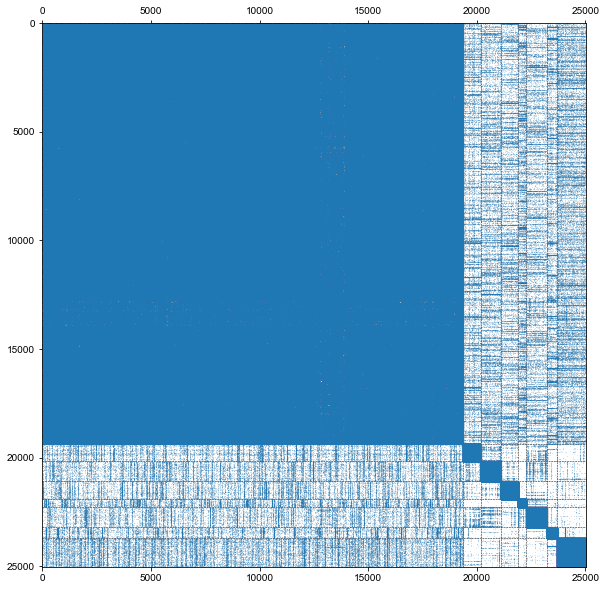

In [8]:
plt.figure(figsize=[10, 10])
o = np.argsort(y_pred)
graph_edgelist_path =  './graphs_' + graph_type + '/' + name + '.edgelist'
A = load_edgelist_graph(graph_edgelist_path)
nocd.utils.plot_sparse_clustered_adjacency(A, n_clusters, y_pred, o, markersize=0.05)